# Convolution Neural Network

## Importing the libraries 
tensorflow and keras 

In [4]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import os

# Data preprocessing


### Training set


In [9]:
train_datagen = ImageDataGenerator(rescale = 1./255,
 shear_range = 0.2,
 zoom_range = 0.2,
 horizontal_flip = True)
training_set = train_datagen.flow_from_directory(r'C:\Users\baigj\Downloads\face-mask-detector\face-mask-detector\dataset',
 target_size = (64, 64),
 batch_size = 32,
 class_mode = 'binary')
os.walk(r'C:\Users\baigj\Downloads\face-mask-detector\face-mask-detector\dataset')


Found 1376 images belonging to 2 classes.


<generator object walk at 0x0000021CC8B7F048>

### validation set

In [38]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory(r'C:\Users\baigj\Downloads\mask-detection-master\mask-detection-master\data',
 target_size = (64, 64),
 batch_size = 32,
 class_mode = 'binary')

Found 166 images belonging to 2 classes.


## Creating neural networks layers

In [39]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


cnn.add(tf.keras.layers.Flatten())


cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))


cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

cnn.add(tf.keras.layers.Dense(units=64, activation='relu'))

cnn.add(tf.keras.layers.Dense(units=64, activation='relu'))

cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [40]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 5)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 43 steps, validate for 6 steps
Epoch 1/5
43/43 [==============================] - 8s 176ms/step - loss: 0.5404 - accuracy: 0.6962 - val_loss: 0.6954 - val_accuracy: 0.7289
Epoch 2/5
43/43 [==============================] - 7s 159ms/step - loss: 0.2054 - accuracy: 0.9310 - val_loss: 0.6732 - val_accuracy: 0.6506
Epoch 3/5
43/43 [==============================] - 7s 162ms/step - loss: 0.1290 - accuracy: 0.9586 - val_loss: 0.7801 - val_accuracy: 0.6867
Epoch 4/5
43/43 [==============================] - 7s 162ms/step - loss: 0.0985 - accuracy: 0.9673 - val_loss: 0.8430 - val_accuracy: 0.6566
Epoch 5/5
43/43 [==============================] - 7s 164ms/step - loss: 0.0841 - accuracy: 0.9673 - val_loss: 0.5601 - val_accuracy: 0.6988


## Testing of self inserted images

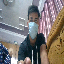

In [43]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img(r'C:\Users\baigj\Pictures\Camera Roll\javed.jpg', target_size = (64, 64))
display(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
 prediction = 'without mask'
else:
 prediction = 'with mask'


In [44]:
print(prediction)

with mask
